In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Ecommerce_UK.csv", encoding="ISO-8859-1")

In [4]:
##Data Cleanning
#Remove duplicate rows
df.drop_duplicates()

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  
0        12/1/2010 8:26       2.55     17850.0  United Kingdom  
1        12/1/2010 8:26       3.39     17850.0  United Kingdom  
2        12/1/2010 8:26       2.75     17850.0  United Kingdom  
3        12/1/2010 8:26       3.39     17850.0  United Kingdom  
4        12/1/2010 8:26       3.39     17850.0  United Kingdom  
...                 ...        ...         ...             ...  
541904  12/9/2011 12:50       0.85     12680.0          France  
541905  12/9/2011 12:50       2.10     12680.0          France  
541906  12/9/2011 12:50       4.15     12680.0          France  
541907  12/9/2011 12:50       4.15     12680.0          France  
541908  12/9/2011 12:50       4.95     12680.0          France  

[536641 rows x 8 columns]

In [5]:
#Remove negative values in colmn 'Quantity'

df_new = df[(df['Quantity'] >= 0)]

In [6]:
# 1. Basic EDA
# e. Unique Values across all columns

In [7]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [8]:
# f. Duplicate values across all columns
df.duplicated(subset=None,keep='first').value_counts()

False    536641
True       5268
dtype: int64

In [9]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Date'] = df['InvoiceDate'].apply(lambda x: str(x).split(" "))
df[['date','hour']] = pd.DataFrame(df['Date'].tolist(), index = df.index)
df['date'] = pd.to_datetime(df['date'])

In [11]:
# 2. Check for missing values in all columns and replace them with the appropriate metric
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Date                0
date                0
hour                0
dtype: int64

In [12]:
# Categorical columns: ['Description', 'CustomerID']. So we cant replace them with (mean/median/mode).
df.dropna(inplace=True)
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Date           0
date           0
hour           0
dtype: int64

In [13]:
# 5. Add the columns - Month, Day and Hour for the invoice
df['Year'] = pd.DatetimeIndex(df['InvoiceDate']).year
df['Month'] = pd.DatetimeIndex(df['InvoiceDate']).month
df['Day'] = pd.DatetimeIndex(df['InvoiceDate']).dayofweek

In [14]:
df2 = df.drop(['Date'],axis=1)

In [15]:
# 6. How many orders made by the customers?
customer = df2.groupby('CustomerID')['InvoiceNo'].count().reset_index()

In [16]:
customer

CustomerID  InvoiceNo
0        12346.0          2
1        12347.0        182
2        12348.0         31
3        12349.0         73
4        12350.0         17
...          ...        ...
4367     18280.0         10
4368     18281.0          7
4369     18282.0         13
4370     18283.0        756
4371     18287.0         70

[4372 rows x 2 columns]

In [17]:
# 7. TOP 5 customers with higher number of orders
top_customers = df2.groupby('CustomerID')['InvoiceNo'].count().nlargest(5)

In [18]:
top_customers

CustomerID
17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
Name: InvoiceNo, dtype: int64

In [20]:
customer.sort_values(by = 'InvoiceNo',ascending=False).head()

CustomerID  InvoiceNo
4042     17841.0       7983
1895     14911.0       5903
1300     14096.0       5128
330      12748.0       4642
1674     14606.0       2782

In [23]:
# 8. How much money spent by the customers?
df2['revenue'] = df2['UnitPrice']*df2['Quantity']

In [25]:
money_spent = df2.groupby('CustomerID')['revenue'].sum()
money_spent

CustomerID
12346.0       0.00
12347.0    4310.00
12348.0    1797.24
12349.0    1757.55
12350.0     334.40
            ...   
18280.0     180.60
18281.0      80.82
18282.0     176.60
18283.0    2094.88
18287.0    1837.28
Name: revenue, Length: 4372, dtype: float64

In [26]:
# 9. TOP 5 customers with highest money spent
money_spent.sort_values(ascending = False).head()

CustomerID
14646.0    279489.02
18102.0    256438.49
17450.0    187482.17
14911.0    132572.62
12415.0    123725.45
Name: revenue, dtype: float64

In [27]:
# 10. How many orders per month?
monthorders=df2.groupby('Month')['InvoiceNo'].nunique().reset_index()

In [28]:
monthorders

Month  InvoiceNo
0       1       1236
1       2       1202
2       3       1619
3       4       1384
4       5       1849
5       6       1707
6       7       1593
7       8       1544
8       9       2078
9      10       2263
10     11       3086
11     12       2629

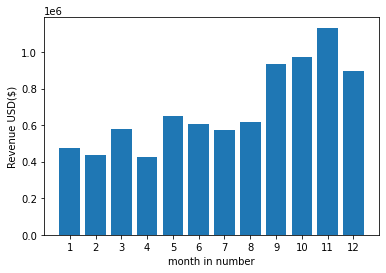

In [31]:
result=df2.groupby('Month').sum()
month=range(1,13)
plt.bar(month,result['revenue'])
plt.xticks(month)
plt.xlabel('month in number')
plt.ylabel('Revenue USD($)')
plt.show()

In [38]:
# 11.How many orders per day?
dayorder = df2.groupby('Day')['InvoiceNo'].nunique().reset_index()

In [39]:
dayorder

Day  InvoiceNo
0    0       3512
1    1       3892
2    2       4110
3    3       4978
4    4       3356
5    6       2342

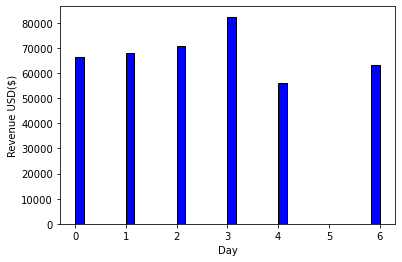

In [40]:
plt.hist(df2['Day'], color = 'blue', edgecolor = 'black',bins = int(180/5))
plt.xlabel('Day')
plt.ylabel('Revenue USD($)')
plt.show()

In [43]:
df2.insert(loc=7, column='Hour', value=df2.InvoiceDate.dt.hour)

In [44]:
# 12. How many orders per hour?
hourorder = df2.groupby('Hour')['InvoiceNo'].nunique().reset_index()

In [45]:
hourorder

Hour  InvoiceNo
0      6         22
1      7         31
2      8        608
3      9       1622
4     10       2613
5     11       2770
6     12       3597
7     13       3043
8     14       2645
9     15       2405
10    16       1491
11    17        842
12    18        257
13    19        217
14    20         28

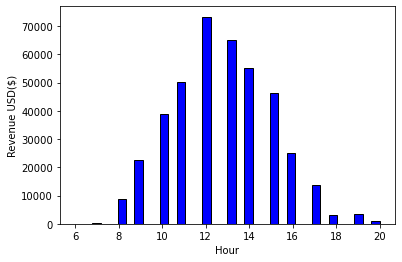

In [46]:
# Histogram (graphical representation of numerical data distribution)

plt.hist(df2['Hour'], color = 'blue', edgecolor = 'black',bins = int(180/5))
plt.xlabel('Hour')
plt.ylabel('Revenue USD($)')
plt.show()

In [47]:
# 13. How many orders for each country?
df.groupby('Country')['InvoiceNo'].count().sort_values(ascending=False)

Country
United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45


In [48]:
# 14. Orders trend across month
ord_trend= df2.groupby('Month')['InvoiceNo'].count().reset_index()

In [49]:
fig,axes = plt.subplots(figsize=(8,6))
ax = sns.lineplot(x ='Month',y='InvoiceNo',data=ord_trend,sort=False)
ax.set_title('Orders trend across Months',fontsize=8)
ax.set_ylabel('Orders',fontsize=8)

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Orders')

In [50]:
# 15. How much money spent by each country?
money_spent_country = df2.groupby('Country')['revenue'].sum().sort_values(ascending=False)

In [51]:
money_spent_country

Country
United Kingdom          6.767873e+06
Netherlands             2.846615e+05
EIRE                    2.502852e+05
Germany                 2.216982e+05
France                  1.967128e+05
Australia               1.370773e+05
Switzerland             5.573940e+04
Spain                   5.477458e+04
Belgium                 4.091096e+04
Sweden                  3.659591e+04
Japan                   3.534062e+04
Norway                  3.516346e+04
Portugal                2.905981e+04
Finland                 2.232674e+04
Channel Islands         2.008629e+04
Denmark                 1.876814e+04
Italy                   1.689051e+04
Cyprus                  1.294629e+04
Austria                 1.015432e+04
Singapore               9.120390e+03
Poland                  7.213140e+03
Israel                  6.994250e+03
Greece                  4.710520e+03
Iceland                 4.310000e+03
Canada                  3.666380e+03
Unspecified             2.667070e+03
Malta                   2.5054

In [52]:
# 1. Perform Basic EDA
# a. Boxplot – All Numeric Variables

<IPython.core.display.Javascript object>

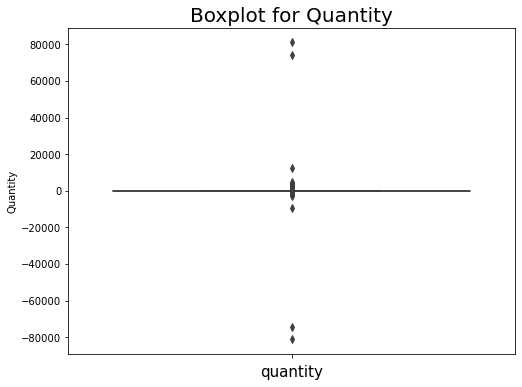

In [55]:
fig,axes = plt.subplots(figsize=(8,6))
sns.boxplot('Quantity',data=df2,orient='v')
plt.xlabel('quantity',fontsize=15)
plt.title('Boxplot for Quantity',fontsize=20)
plt.show()

<IPython.core.display.Javascript object>

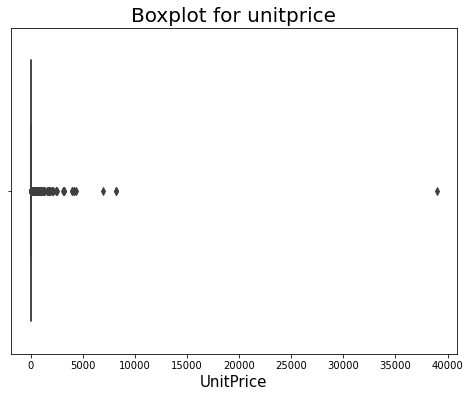

In [57]:
fig,axes = plt.subplots(figsize=(8,6))
sns.boxplot('UnitPrice',data=df2,orient='h')
plt.xlabel('UnitPrice',fontsize=15)
plt.title('Boxplot for unitprice',fontsize=20)
plt.show()

In [58]:
# b. Histogram – All Numeric Variables
plt.hist(df2['Quantity'], bins= 20, color='blue', alpha=1)
plt.title('Quantity_distribution')
plt.show()

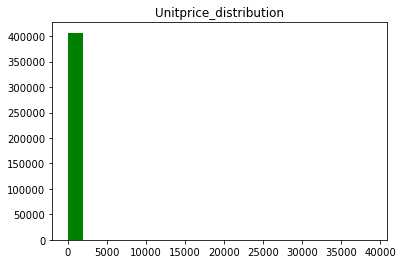

In [59]:
plt.hist(df2['UnitPrice'], bins= 20, color='green', alpha=1)
plt.title('Unitprice_distribution')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

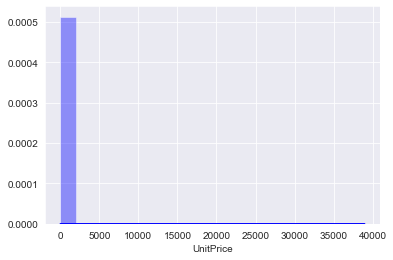

In [61]:
# c. Distribution Plot – Numeric Variables
sns.set_style('darkgrid') 
sns.distplot(df2['UnitPrice'] , color ='blue', bins = 20)

In [63]:
# d. Aggregation for all numerical Column
df2.aggregate({"Quantity":['min', 'mean', 'max', 'sum'],  
              "UnitPrice":['min', 'mean', 'max', 'sum'],  
              "revenue":['min', 'mean', 'max', 'sum']})

Quantity     UnitPrice       revenue
min  -8.099500e+04  0.000000e+00 -1.684696e+05
mean  1.206130e+01  3.460471e+00  2.040185e+01
max   8.099500e+04  3.897000e+04  1.684696e+05
sum   4.906888e+06  1.407820e+06  8.300066e+06

<IPython.core.display.Javascript object>

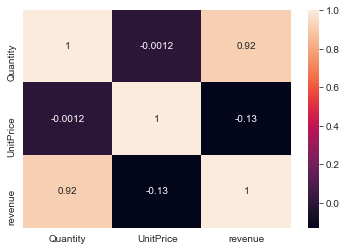

In [64]:
# g. Correlation – Heatmap - All Numeric Variables
sns.heatmap(df2[['Quantity','UnitPrice','revenue']].corr(),xticklabels='auto',yticklabels='auto',annot=True,fmt='.2g')

<IPython.core.display.Javascript object>

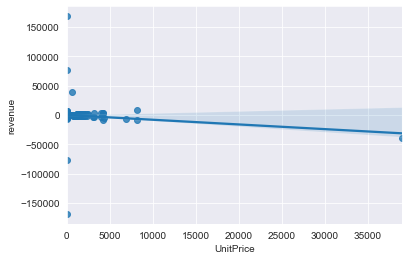

In [65]:
# h. Regression Plot - All Numeric Variables
sns.regplot(x='UnitPrice',y='revenue',data=df2)

<IPython.core.display.Javascript object>

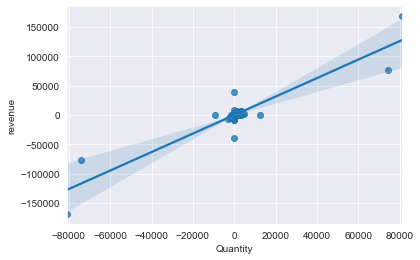

In [66]:
sns.regplot(x='Quantity',y='revenue',data=df2)

In [67]:
sns.regplot(x='UnitPrice',y='Quantity',data=df2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

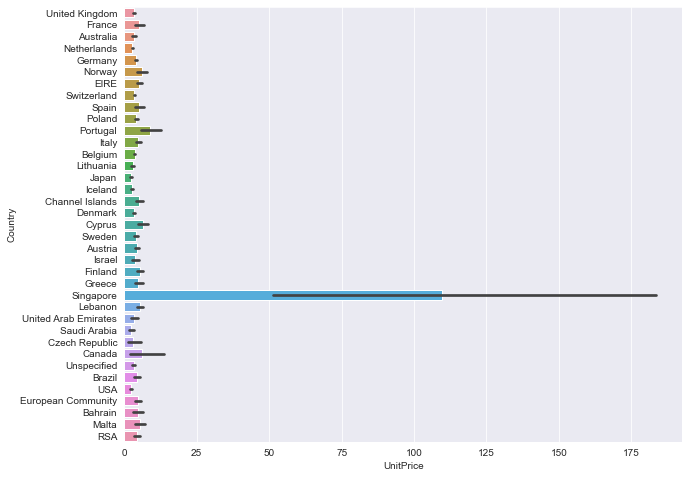

In [82]:
# i. Bar Plot – Every Categorical Variable vs every Numerical Variable
plt.figure(figsize=(10,8))
sns.barplot(x ='UnitPrice', y ='Country', data = df2)

In [81]:
plt.figure(figsize=(10,8))
sns.barplot(x ='revenue', y ='Country', data = df2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

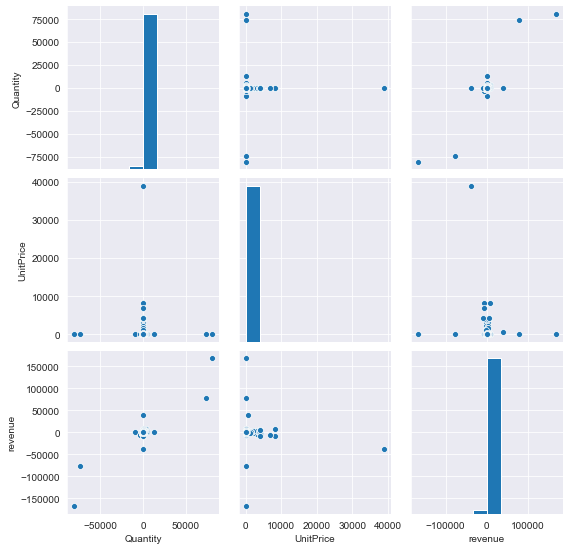

In [72]:
# j. Pair plot - All Numeric Variables
sns.pairplot(data=df2[['Quantity','UnitPrice','revenue']])

In [73]:
# k. Line chart to show the trend of data - All Numeric/Date Variables
month_quantities = df2.groupby('Month')['Quantity'].sum().reset_index()

In [74]:
month_revenue = df2.groupby('Month')['revenue'].sum().reset_index()

<IPython.core.display.Javascript object>

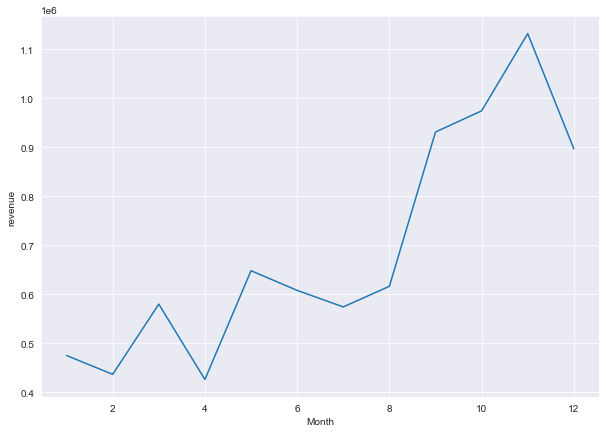

In [75]:
fig,axes = plt.subplots(figsize=(10,7))
ax = sns.lineplot(x ='Month',y='revenue',data=month_revenue,sort=False)

In [76]:
week_sales = df2.groupby('Day')['revenue'].sum().reset_index()

<IPython.core.display.Javascript object>

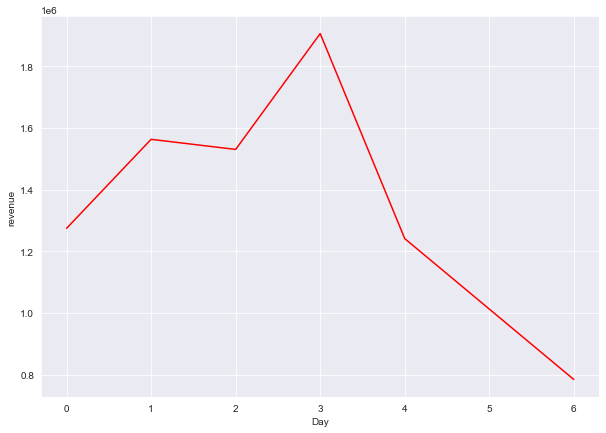

In [83]:
fig,axes = plt.subplots(figsize=(10,7))
ax = sns.lineplot(x='Day',y='revenue',data=week_sales,color='r',sort=False)

In [78]:
# l. Plot the skewness - All Numeric Variables
df2[['Quantity','UnitPrice','revenue']].skew(axis = 0, skipna = True)

Quantity       0.182663
UnitPrice    452.219019
revenue       -0.056982
dtype: float64

In [79]:
df2.skew(axis=0,skipna=True)

Quantity        0.182663
UnitPrice     452.219019
CustomerID      0.029835
Hour            0.195271
Year           -3.496094
Month          -0.442503
Day             0.399899
revenue        -0.056982
dtype: float64

In [71]:
data_revenue = df2.groupby('Month')['revenue'].sum().reset_index()

<IPython.core.display.Javascript object>

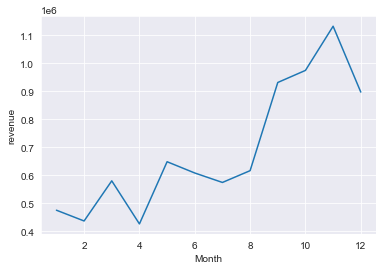

In [80]:
ax = sns.lineplot(x='Month',y='revenue',data=data_revenue,sort=False)

In [84]:
data_revenue['MonthlyGrowth'] = data_revenue['revenue'].pct_change()

In [85]:
data_revenue

Month      revenue  MonthlyGrowth
0       1   475074.380            NaN
1       2   436546.150      -0.081099
2       3   579964.610       0.328530
3       4   426047.851      -0.265390
4       5   648251.080       0.521545
5       6   608013.160      -0.062072
6       7   574238.481      -0.055549
7       8   616368.000       0.073366
8       9   931440.372       0.511176
9      10   974603.590       0.046340
10     11  1132407.740       0.161916
11     12   897110.400      -0.207785

In [86]:
data_revenue['MonthlyGrowth'] = data_revenue['MonthlyGrowth'].fillna(0)

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Monthly Growth Rate')

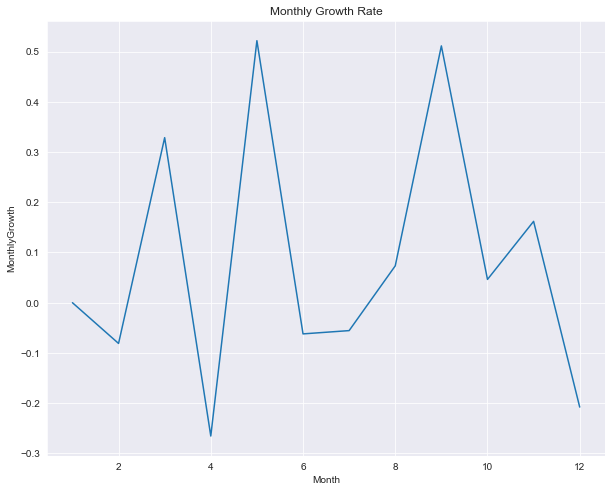

In [87]:
fig,axes = plt.subplots(figsize=(10,8))
ax = sns.lineplot(x='Month',y='MonthlyGrowth',data=data_revenue,sort=False)
ax.set_title('Monthly Growth Rate')

In [88]:
# monthly active customers
monthlyactive = df2.groupby('Month')['CustomerID'].nunique().reset_index()
monthlyactive

Month  CustomerID
0       1         783
1       2         798
2       3        1020
3       4         899
4       5        1079
5       6        1051
6       7         993
7       8         980
8       9        1302
9      10        1425
10     11        1711
11     12        1374

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Monthly Active Customers')

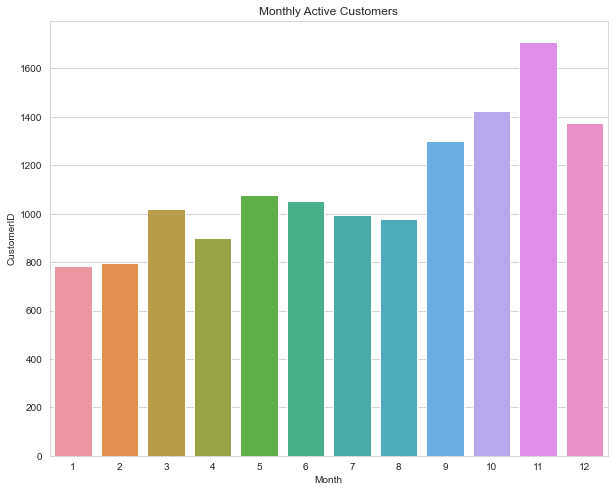

In [94]:
sns.set_style('whitegrid') 
fig,axes = plt.subplots(figsize=(10,8))
ax = sns.barplot(x='Month',y='CustomerID',data=monthlyactive)
ax.set_title('Monthly Active Customers')


In [95]:
cust_min_purchase_date = df2.groupby('CustomerID').date.min().reset_index()

In [96]:
cust_min_purchase_date

CustomerID       date
0        12346.0 2011-01-18
1        12347.0 2010-12-07
2        12348.0 2010-12-16
3        12349.0 2011-11-21
4        12350.0 2011-02-02
...          ...        ...
4367     18280.0 2011-03-07
4368     18281.0 2011-06-12
4369     18282.0 2011-08-05
4370     18283.0 2011-01-06
4371     18287.0 2011-05-22

[4372 rows x 2 columns]

In [97]:
cust_min_purchase_date.columns=['CustomerID','Minpurchasedate']

In [98]:
cust_min_purchase_date['Minpurchasemonth'] = cust_min_purchase_date['Minpurchasedate'].map(lambda date:date.month)

In [99]:
cust_min_purchase_date

CustomerID Minpurchasedate  Minpurchasemonth
0        12346.0      2011-01-18                 1
1        12347.0      2010-12-07                12
2        12348.0      2010-12-16                12
3        12349.0      2011-11-21                11
4        12350.0      2011-02-02                 2
...          ...             ...               ...
4367     18280.0      2011-03-07                 3
4368     18281.0      2011-06-12                 6
4369     18282.0      2011-08-05                 8
4370     18283.0      2011-01-06                 1
4371     18287.0      2011-05-22                 5

[4372 rows x 3 columns]

In [100]:
df2 = pd.merge(df2,cust_min_purchase_date, on ='CustomerID')

In [101]:
df2.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID  Hour         Country       date  \
0 2010-12-01 08:26:00       2.55     17850.0     8  United Kingdom 2010-12-01   
1 2010-12-01 08:26:00       3.39     17850.0     8  United Kingdom 2010-12-01   
2 2010-12-01 08:26:00       2.75     17850.0     8  United Kingdom 2010-12-01   
3 2010-12-01 08:26:00       3.39     17850.0     8  United Kingdom 2010-12-01   
4 2010-12-01 08:26:00       3.39     17850.0     8  United Kingdom 2010-12-01   

       hour  Year  Month  Day  revenue Minpurchasedate  Minpurchasemonth  
0  08:26:00  2010     12    2    15.30      2010-12-01                12  
1  08:26:00  2010     12    2    20.34      2010-12-01                12  
2  08:26:00  2010     12    2    22.00      2010-12-01                12  
3  08:26:00  2010     12    2    20.34      2010-12-01                12  
4  08:26:00  2010     12    2    20.34      2010-12-01                12

In [102]:
df2['usertype']='New'
df2.loc[df2['Month']>df2['Minpurchasemonth'],'usertype' ]= 'Existing'

In [110]:
df2[df2['usertype']=='Existing'].head()

InvoiceNo StockCode                      Description  Quantity  \
177289    552288     21519  GIN & TONIC DIET GREETING CARD         12   
177290    552288     22898    CHILDRENS APRON APPLES DESIGN         8   
177291    552288     23202           JUMBO BAG VINTAGE LEAF        10   
177292    552288     20727          LUNCH BAG  BLACK SKULL.        10   
177293    552288    84997D  CHILDRENS CUTLERY POLKADOT PINK         4   

               InvoiceDate  UnitPrice  CustomerID  Hour         Country  \
177289 2011-05-08 13:20:00       0.42     13313.0    13  United Kingdom   
177290 2011-05-08 13:20:00       1.95     13313.0    13  United Kingdom   
177291 2011-05-08 13:20:00       2.08     13313.0    13  United Kingdom   
177292 2011-05-08 13:20:00       1.65     13313.0    13  United Kingdom   
177293 2011-05-08 13:20:00       4.15     13313.0    13  United Kingdom   

             date      hour  Year  Month  Day  revenue Minpurchasedate  \
177289 2011-05-08  13:20:00  2011      5    6     5.04      2011-01-04   
177290 2011-05-08  13:20:00  2011      5    6    15.60      2011-01-04   
177291 2011-05-08  13:20:00  2011      5    6    20.80      2011-01-04   
177292 2011-05-08  13:20:00  2011      5    6    16.50      2011-01-04   
177293 2011-05-08  13:20:00  2011      5    6    16.60      2011-01-04   

        Minpurchasemonth  usertype  
177289                 1  Existing  
177290                 1  Existing  
177291                 1  Existing  
177292                 1  Existing  
177293                 1  Existing

In [105]:
usertype_revenue = df2.groupby(['Month','usertype'])['revenue'].sum().reset_index()

In [106]:
usertype_revenue

Month  usertype     revenue
0       1       New  475074.380
1       2  Existing   56168.550
2       2       New  380377.600
3       3  Existing   87525.140
4       3       New  492439.470
5       4  Existing  105355.620
6       4       New  320692.231
7       5  Existing  210780.630
8       5       New  437470.450
9       6  Existing  202592.290
10      6       New  405420.870
11      7  Existing  204448.300
12      7       New  369790.181
13      8  Existing  227827.100
14      8       New  388540.900
15      9  Existing  311581.101
16      9       New  619859.271
17     10  Existing  380836.990
18     10       New  593766.600
19     11  Existing  487194.130
20     11       New  645213.610
21     12  Existing  132914.680
22     12       New  764195.720

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'revenue by usertype')

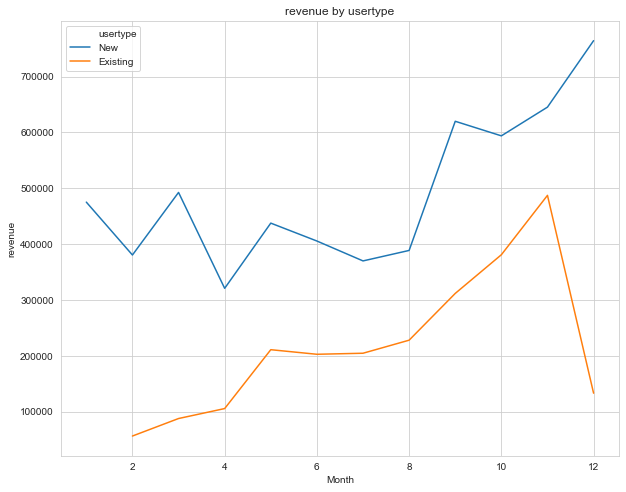

In [107]:
fig,axes = plt.subplots(figsize=(10,8))

ax = sns.lineplot(data=usertype_revenue,x='Month',y='revenue', hue='usertype')
ax.set_title('revenue by usertype')